In [12]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os

In [13]:
DIR = '../datasets/isic_2024'
DIR_IMG = '../datasets/isic_2024/train-image/image/'

In [14]:
# Train metadata
df = pd.read_csv(os.path.join(DIR, 'train-metadata.csv'))
df = df.ffill() # fills NaN values with the previous value
df.head()

# Test metadata
df_test = pd.read_csv(os.path.join(DIR, 'test-metadata.csv'))
df_test = df_test.ffill() # fills NaN values with the previous value
#df_test.head()

/var/folders/t2/924llr7552s5t3whlr5cww8c0000gn/T/ipykernel_2441/2561503164.py:2: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(DIR, 'train-metadata.csv'))


In [15]:
df.shape

(401059, 55)

In [16]:
print(df.columns)

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [17]:
# Assuming df is your DataFrame and contains a 'patient_id' column

# Calculate the number of unique patients
num_unique_patients = df['patient_id'].nunique()

# Display the result
print(f"Total number of individual patients in the dataset: {num_unique_patients}")

Total number of individual patients in the dataset: 1042


In [18]:
# Check the class balance
class_counts = df['target'].value_counts()
print(class_counts)

# as a percentage
class_percentage = df['target'].value_counts(normalize=True) * 100
print("\nClass balance (in percentage):")
print(class_percentage)

0    400666
1       393
Name: target, dtype: int64

Class balance (in percentage):
0    99.902009
1     0.097991
Name: target, dtype: float64


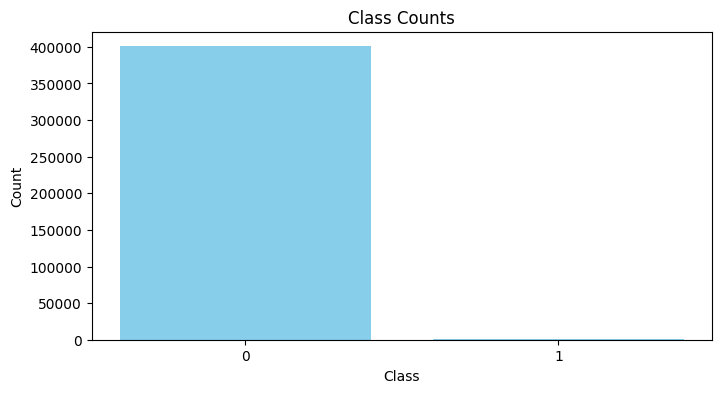

In [19]:
# Plotting the class counts
plt.figure(figsize=(8, 4))
plt.bar(class_counts.index.astype(str), class_counts.values, color='skyblue')
plt.title('Class Counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [20]:
# Class Weight
# during training model calculates the loss for each sample
# with class weights, loss for minority class is multiplied by a larger weihgt making mistakes on this class more costly
# so on minority class the optimizer makes bigger adjustments to the model weights
# the class weights tell the model "this mistake is a big deal"
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(df['target'])
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=df['target'])

# Convert to a dictionary to print
class_weight_dict = dict(zip(classes, class_weights))

print("Class Weights:", class_weight_dict)

Class Weights: {0: 0.5004904334283418, 1: 510.25318066157763}


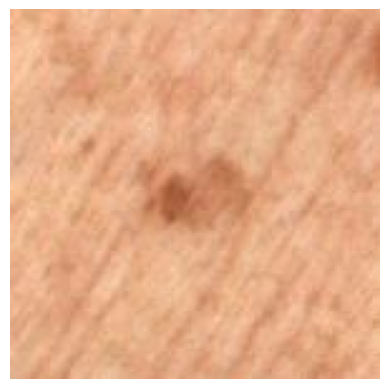

In [21]:
import cv2
import matplotlib.pyplot as plt

# img_id from df
isic_id = df.isic_id.iloc[10]
# construct img path
image_path = os.path.join(DIR_IMG, f'{isic_id}.jpg')
# read img
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
# convert bgr -> rgb
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# display img
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes for a cleaner look
plt.show()

In [22]:
import pandas as pd

# Assuming df is your DataFrame
# Get the count of occurrences for each patient_id
patient_counts = df['patient_id'].value_counts()

# Display the patient counts
print("Patient Occurrences:\n", patient_counts[:5])

# Additional statistics about patient occurrences
num_unique_patients = df['patient_id'].nunique()
max_occurrences = patient_counts.max()
avg_occurrences = patient_counts.mean()
min_occurrences = patient_counts.min()

# Display the additional information
print(f"\nNumber of unique patients: {num_unique_patients}")
print(f"Maximum occurrences for a single patient: {max_occurrences}")
print(f"Average occurrences for a single patient: {avg_occurrences}")
print(f"Minimum occurrences for a single patient: {min_occurrences}")

Patient Occurrences:
 IP_1117889    9184
IP_5714646    6267
IP_3921915    5568
IP_7797815    4454
IP_9577633    3583
Name: patient_id, dtype: int64

Number of unique patients: 1042
Maximum occurrences for a single patient: 9184
Average occurrences for a single patient: 384.8934740882917
Minimum occurrences for a single patient: 1


In [23]:
# Assuming df is your DataFrame and it contains 'patient_id', 'isic_id', and other relevant columns

# Specify the patient ID
patient_id = 'IP_9577633'

# Filter the DataFrame for the specified patient
patient_data = df[df['patient_id'] == patient_id]

# Display the filtered data
print(f"Information for patient {patient_id}:\n", patient_data)

# Additional summary information
num_images = patient_data.shape[0]
print(f"\nTotal number of images associated with patient {patient_id}: {num_images}")

# If the DataFrame contains labels or other metadata, display a summary
if 'label' in df.columns:
    label_counts = patient_data['label'].value_counts()
    print(f"\nLabel distribution for patient {patient_id}:\n", label_counts)

Information for patient IP_9577633:
              isic_id  target  patient_id  age_approx   sex  \
38      ISIC_0052367       0  IP_9577633        50.0  male   
126     ISIC_0076380       0  IP_9577633        50.0  male   
388     ISIC_0082833       0  IP_9577633        50.0  male   
508     ISIC_0085604       0  IP_9577633        50.0  male   
772     ISIC_0091937       0  IP_9577633        50.0  male   
...              ...     ...         ...         ...   ...   
400171  ISIC_9978768       0  IP_9577633        50.0  male   
400602  ISIC_9989418       0  IP_9577633        50.0  male   
400636  ISIC_9990206       0  IP_9577633        50.0  male   
400875  ISIC_9995445       0  IP_9577633        50.0  male   
400945  ISIC_9997293       0  IP_9577633        50.0  male   

       anatom_site_general  clin_size_long_diam_mm          image_type  \
38         lower extremity                    3.15  TBP tile: close-up   
126        upper extremity                    3.87  TBP tile: close-up

In [24]:
# Assuming df contains columns 'patient_id' and 'label'

# Specify the patient ID
patient_id = 'IP_9577633'

# Filter the DataFrame for the specified patient
patient_data = df[df['patient_id'] == patient_id]

# Get the unique labels (targets) for this patient
unique_labels = patient_data['target'].unique()

# Display the results
print(f"Unique labels for patient {patient_id}: {unique_labels}")

# Check if the target ever changes
if len(unique_labels) > 1:
    print(f"The target changes for patient {patient_id}.")
else:
    print(f"The target does not change for patient {patient_id}.")

Unique labels for patient IP_9577633: [0]
The target does not change for patient IP_9577633.


# Data Split

If you see above, the patient occurrences is quite shocking. The average patient gets shown up in the dataset 385 times. We need to use Stratified folds to make sure patients are not split across training and validation sets. 

In [25]:
from sklearn.model_selection import StratifiedGroupKFold

# Initialize the splitter for one split (similar to ShuffleSplit)
sgkf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=12)

# Assign fold numbers
df["fold"] = -1
# Iterate over the folds
for fold, (_, val_idx) in enumerate(sgkf.split(df, df.target, groups=df.patient_id)):
    df.loc[val_idx, "fold"] = fold

# Use the first fold for validation (mimicking a single split)
training_df = df[df.fold != 0].reset_index(drop=True)
validation_df = df[df.fold == 0].reset_index(drop=True)

# Output the sizes
print(f"# Num Train: {len(training_df)} | # Num Valid: {len(validation_df)}")

# Num Train: 325544 | # Num Valid: 75515


In [26]:
training_df.target.value_counts()

0    325226
1       318
Name: target, dtype: int64

In [27]:
validation_df.target.value_counts()

0    75440
1       75
Name: target, dtype: int64

# Tabular Features

You can use the age, location, etc to increase model performance

In [28]:
training_df.sex.head()

0    male
1    male
2    male
3    male
4    male
Name: sex, dtype: object

In [29]:
# Categorical features which will be one hot encoded
CATEGORICAL_COLUMNS = ["sex", "anatom_site_general",
            "tbp_tile_type","tbp_lv_location", ]

# Numeraical features which will be normalized
NUMERIC_COLUMNS = ["age_approx", "tbp_lv_nevi_confidence", "clin_size_long_diam_mm",
           "tbp_lv_areaMM2", "tbp_lv_area_perim_ratio", "tbp_lv_color_std_mean",
           "tbp_lv_deltaLBnorm", "tbp_lv_minorAxisMM", ]

# Tabular feature columns
FEAT_COLS = CATEGORICAL_COLUMNS + NUMERIC_COLUMNS